In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
import csv
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar


In [25]:
tfidf_path = '../../data/tfidf_merged_chs_20210915_nocrossover/'

In [26]:
# lda_path = '../../data/lda_merged_chs_202001_full/'

In [27]:
fandom_list = [item for item in os.listdir(tfidf_path) if 'tsv' in item]

In [28]:
fandom_list = [item.split('_temporal')[0] for item in fandom_list]

In [29]:
fandom_list

['hamilton_miranda',
 'haikyuu',
 'the_walking_dead_&_related_fandoms',
 'sherlock_holmes_&_related_fandoms',
 'hetalia_axis_powers',
 'shakespare_william_works',
 'arthurian_mythology_&_related_fandoms',
 'dcu',
 'marvel',
 'ms_paint_adventures',
 'kuroko_no_basuke',
 'dragon_age_all_media_types',
 'star_wars_all_media_types',
 'harry_potter',
 'doctor_who_&_related_fandoms',
 'supernatural',
 'naruto',
 'buffy_the_vampire_slayer',
 'one_direction',
 'attack_on_titan',
 'bishoujo_senshi_sailor_moon',
 'tolkien_j_r_r_works_&_related_fandoms']

In [30]:
# fandom_list

In [31]:
def normalize_dfs(df):
    
    # normalization of the success field
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    # normalize by chapter number
    df['Kudos'] = df['Kudos']/df['Chapters'] 
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Kudos'].dropna()

    df['Hits'] = df['Hits']/df['Chapters']
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].dropna()

    df['Bookmarks'] = df['Bookmarks']/df['Chapters']
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Bookmarks'].dropna()
    return df

In [36]:
def check_term_dist(fandom_name):
#     df_topic = pd.read_csv(os.path.join(lda_path, fandom_name + \
#                                         '_temporal_lda_jsd_toprev_with_dist_merged_chs_no_text.tsv'), sep='\t')
#     df_topic = normalize_dfs(df_topic)
#     # highest 10%
#     topic_high_th = np.percentile(df_topic.JSD,90)
#     # lowest 10%
#     topic_low_th = np.percentile(df_topic.JSD, 10)
#     topic_high = df_topic[df_topic.JSD > topic_high_th ]
#     topic_mod = df_topic[(df_topic.JSD <= topic_high_th) & (df_topic.JSD > topic_low_th) ]
#     topic_low = df_topic[df_topic.JSD < topic_low_th ]

#     plt.figure()
#     plt.hist(topic_high.Kudos, density=True, alpha=0.5, label='high novelty')
# #     plt.yscale('log')
#     plt.title(fandom_name + ' ' + 'Topic')
#     plt.hist(topic_mod.Kudos, density=True, alpha=0.5, label='mid novelty')
# #     plt.yscale('log')
#     plt.hist(topic_low.Kudos, density=True, alpha=0.5, label='low novelty')
#     plt.yscale('log')
#     plt.legend()
    
    df_term = pd.read_csv(os.path.join(tfidf_path, fandom_name + \
                                       '_temporal_tfidf_cos_merged_chapters_no_crossover_no_sample_20210915.tsv'), sep='\t')
    df_term = normalize_dfs(df_term)
#     print(fandom_name)
#     print(np.percentile(df_term.Cos, 90))
#     print(np.percentile(df_term.Cos, 10))
    # highest 10%
    plt.figure()
    plt.hist(df_term.Cos, bins=10)
    plt.title(fandom_name)
    plt.figure()
    plt.hexbin(df_term.Cos, np.log(df_term.Kudos), gridsize=20)

    
    term_high_th = np.percentile(df_term.Cos, 90)
    # lowest 10%
    term_low_th = np.percentile(df_term.Cos, 10)
    term_med_th1 = np.percentile(df_term.Cos, 45)
    term_med_th2 = np.percentile(df_term.Cos, 55)

    term_high = df_term[df_term.Cos > term_high_th ]
    term_med = df_term[(df_term.Cos <= term_med_th2) & (df_term.Cos > term_med_th1) ]
    term_low = df_term[df_term.Cos < term_low_th ]

    max_kudos = max(max(term_high.Kudos), max(term_med.Kudos), max(term_low.Kudos))
    bins = np.linspace(0, max_kudos, 10)
    
#     plt.figure()
#     plt.hist(term_high.Kudos, density=True, alpha=0.4, bins=bins, label='high novelty')
#     plt.yscale('log')
#     plt.title(fandom_name + ' term')
#     plt.hist(term_med.Kudos, density=True, alpha=0.4, bins=bins,label='mid novelty' )
#     plt.yscale('log')
#     plt.hist(term_low.Kudos, density=True, alpha=0.4, bins=bins,label='low novelty')
#     plt.yscale('log')
#     plt.legend()
    


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


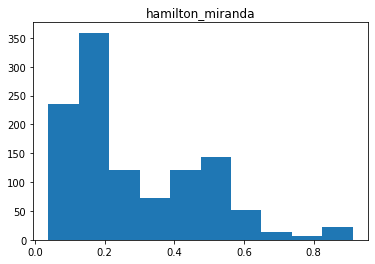

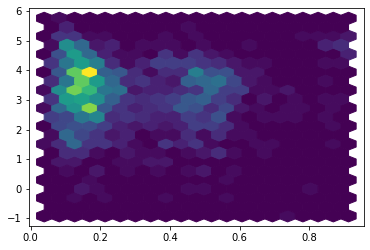

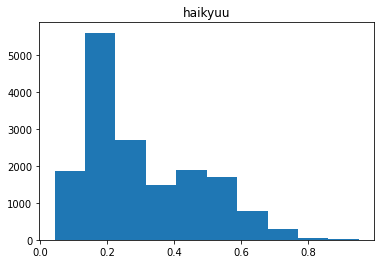

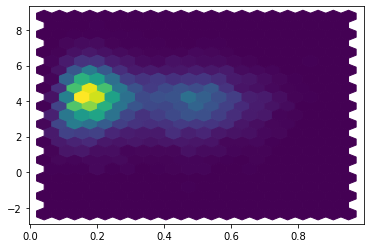

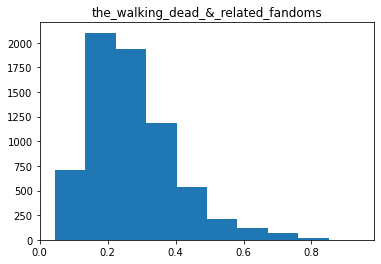

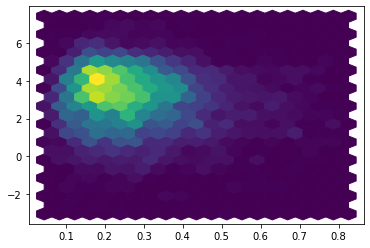

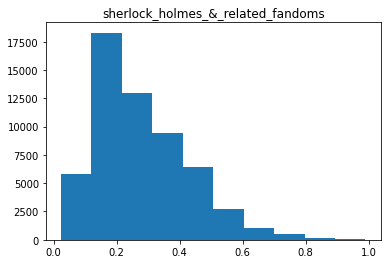

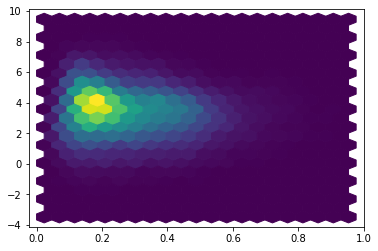

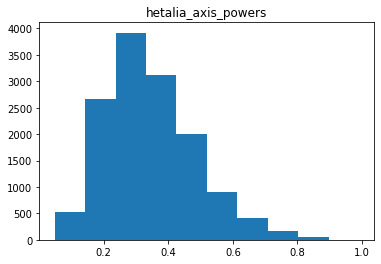

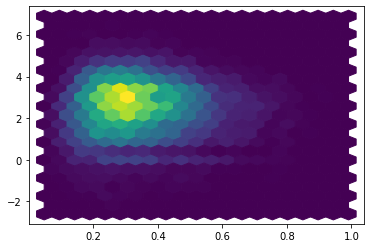

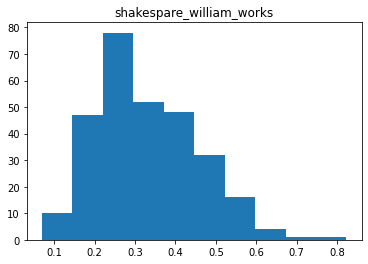

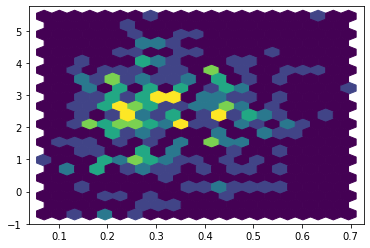

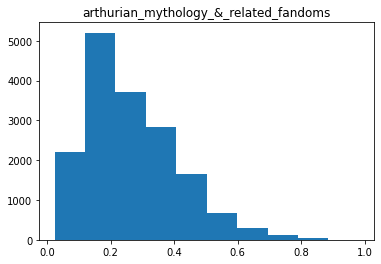

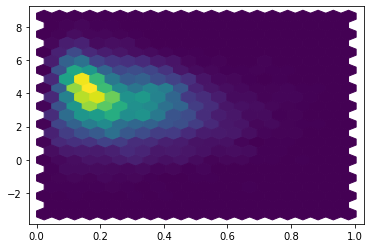

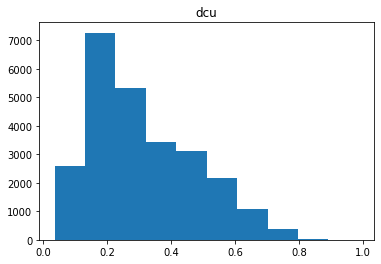

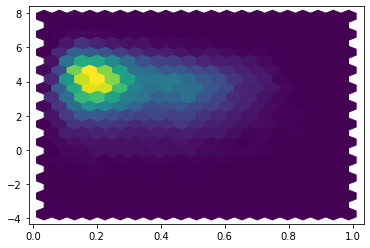

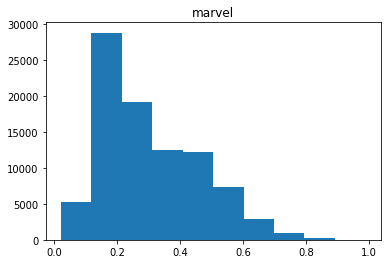

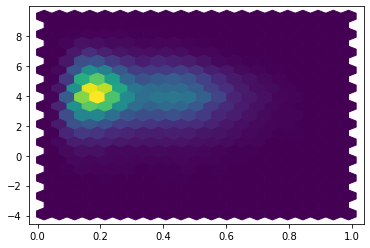

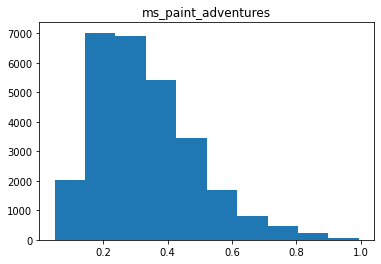

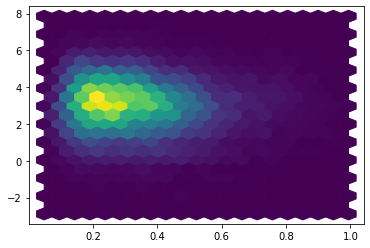

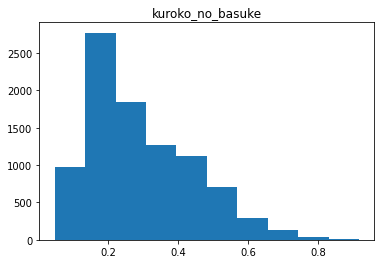

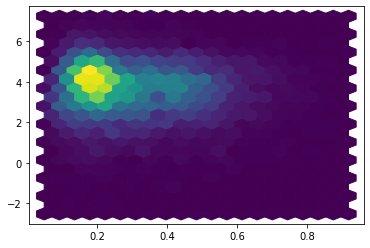

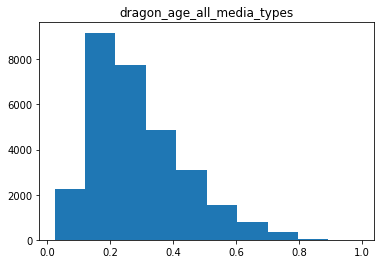

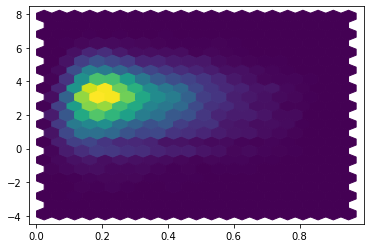

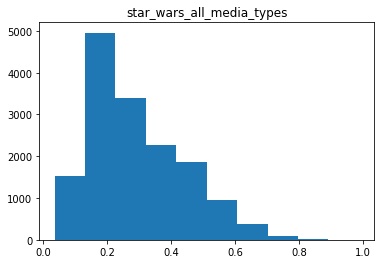

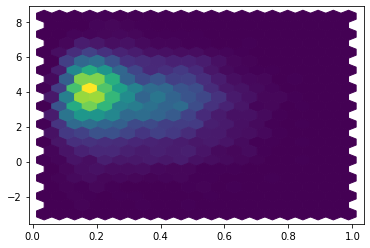

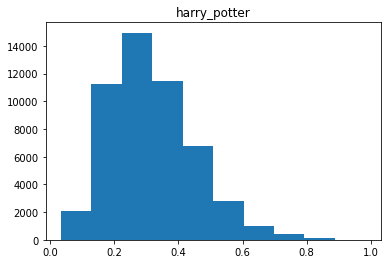

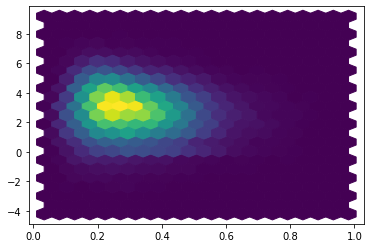

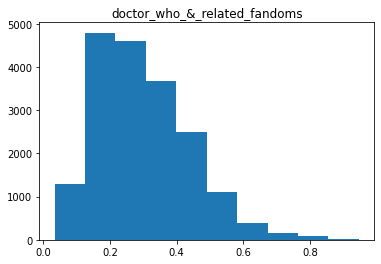

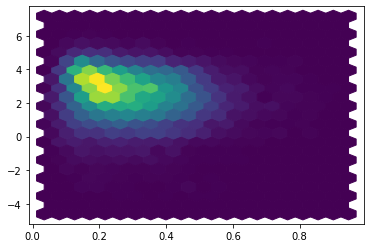

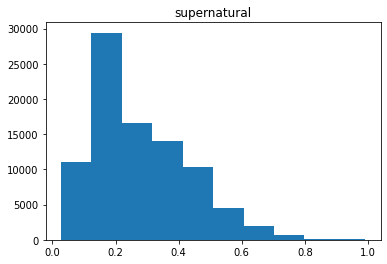

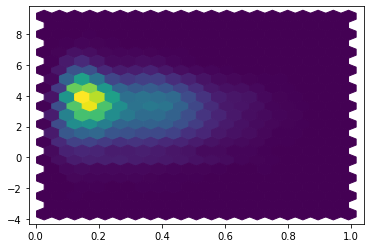

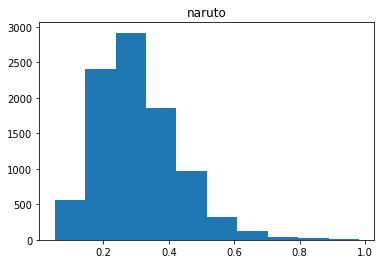

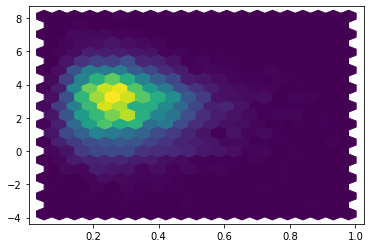

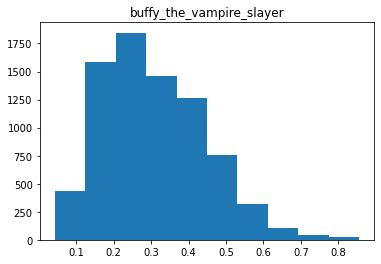

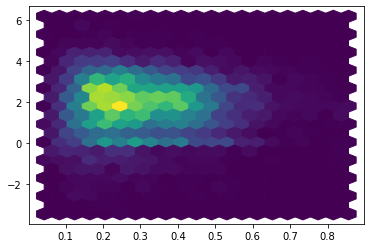

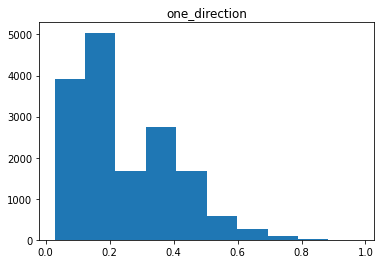

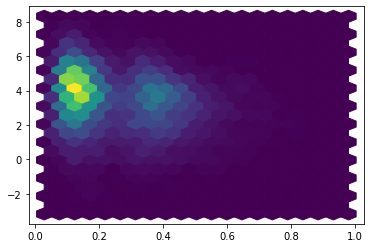

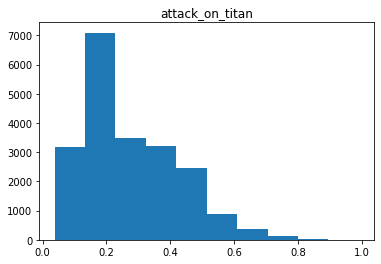

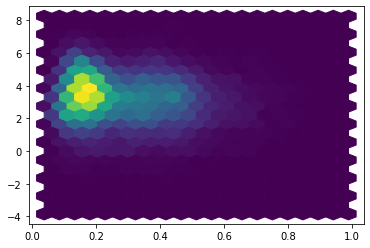

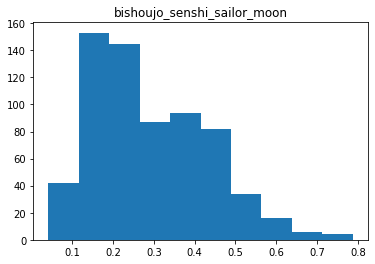

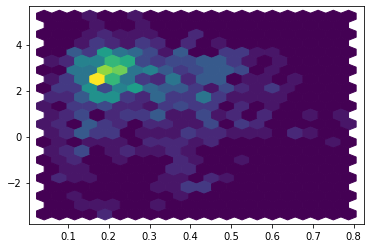

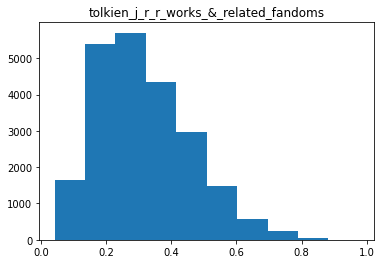

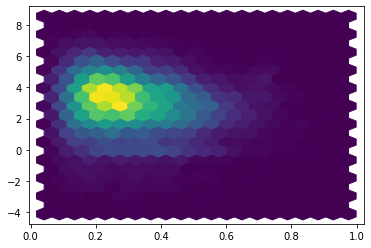

In [38]:
for fandom in fandom_list:
    check_term_dist(fandom)


In [42]:
def check_stratified_term_dist(fandom_name):

    
    df_term = pd.read_csv(os.path.join(tfidf_path, fandom_name + \
                                       '_temporal_tfidf_cos_merged_chapters_no_crossover_no_sample_20210915.tsv'), sep='\t')
    df_term = normalize_dfs(df_term)

    term_high_th = np.percentile(df_term.Cos, 90)
    # lowest 10%
    term_low_th = np.percentile(df_term.Cos, 10)
    term_med_th1 = np.percentile(df_term.Cos, 45)
    term_med_th2 = np.percentile(df_term.Cos, 55)

    term_high = df_term[df_term.Cos > term_high_th ]
    term_med = df_term[(df_term.Cos <= term_med_th2) & (df_term.Cos > term_med_th1) ]
    term_low = df_term[df_term.Cos < term_low_th ]

    max_kudos = max(max(term_high.Kudos), max(term_med.Kudos), max(term_low.Kudos))
    bins = np.linspace(0, max_kudos, 10)
    
    plt.figure()
    plt.hist(term_high.Kudos, density=True, alpha=0.4, bins=bins, label='high novelty')
    plt.yscale('log')
    plt.title(fandom_name)
    plt.hist(term_med.Kudos, density=True, alpha=0.4, bins=bins,label='mid novelty' )
    plt.yscale('log')
    plt.hist(term_low.Kudos, density=True, alpha=0.4, bins=bins,label='low novelty')
    plt.yscale('log')
    plt.legend()
    


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


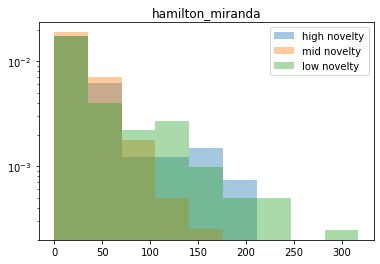

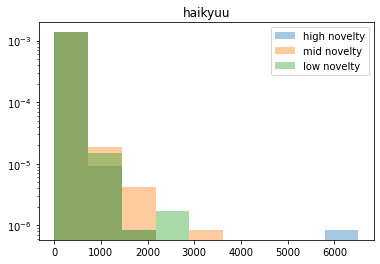

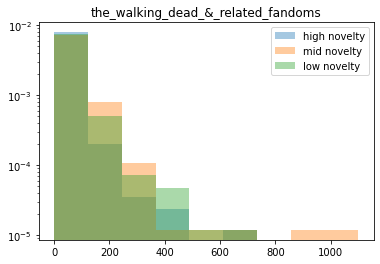

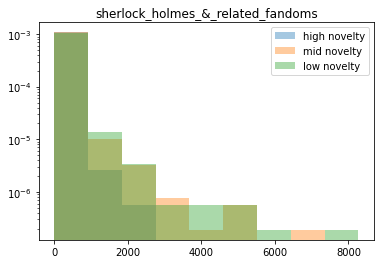

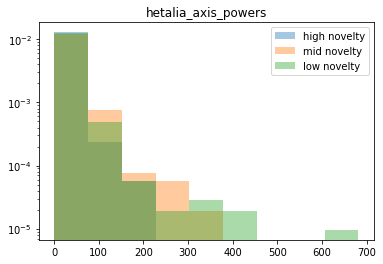

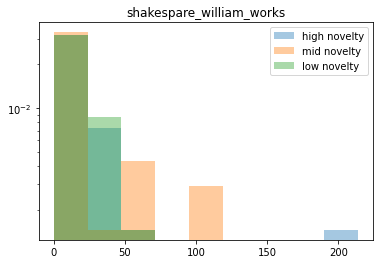

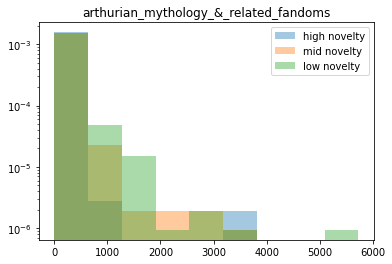

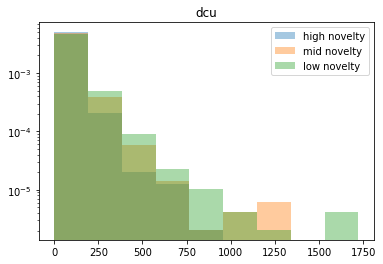

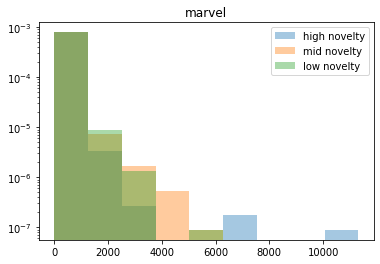

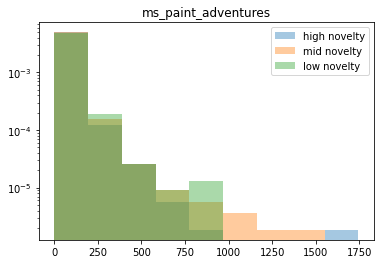

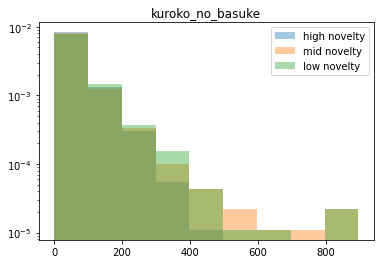

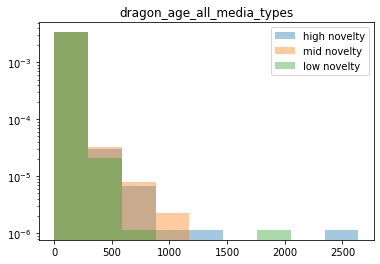

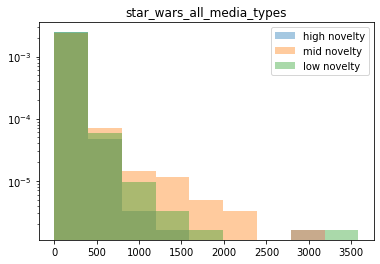

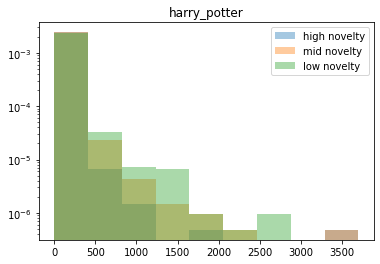

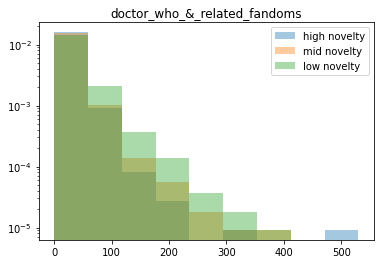

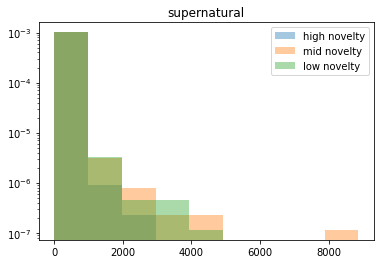

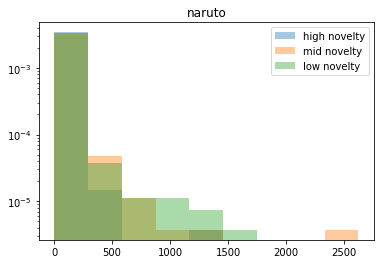

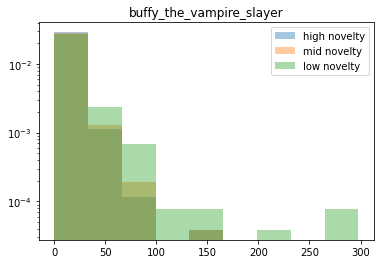

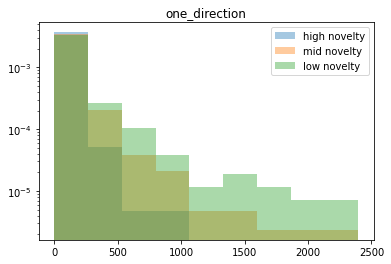

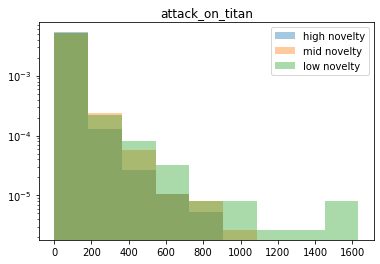

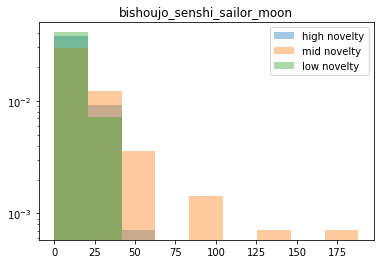

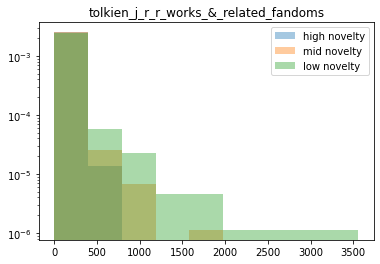

In [43]:
for fandom in fandom_list:
    check_stratified_term_dist(fandom)
